In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

In [2]:
df = pd.read_csv('train_revised.csv', encoding = 'unicode_escape')

In [3]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [4]:
df.shape

(51645, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [6]:
df['max_capacity'].unique()

array([49, 11], dtype=int64)

In [7]:
df['max_capacity'].value_counts()

49    31985
11    19660
Name: max_capacity, dtype: int64

In [8]:
df['car_type'].unique()

array(['Bus', 'shuttle'], dtype=object)

In [9]:
df.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


In [10]:
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df['ride_id'] = df['ride_id'].astype('str')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(51645, 10)

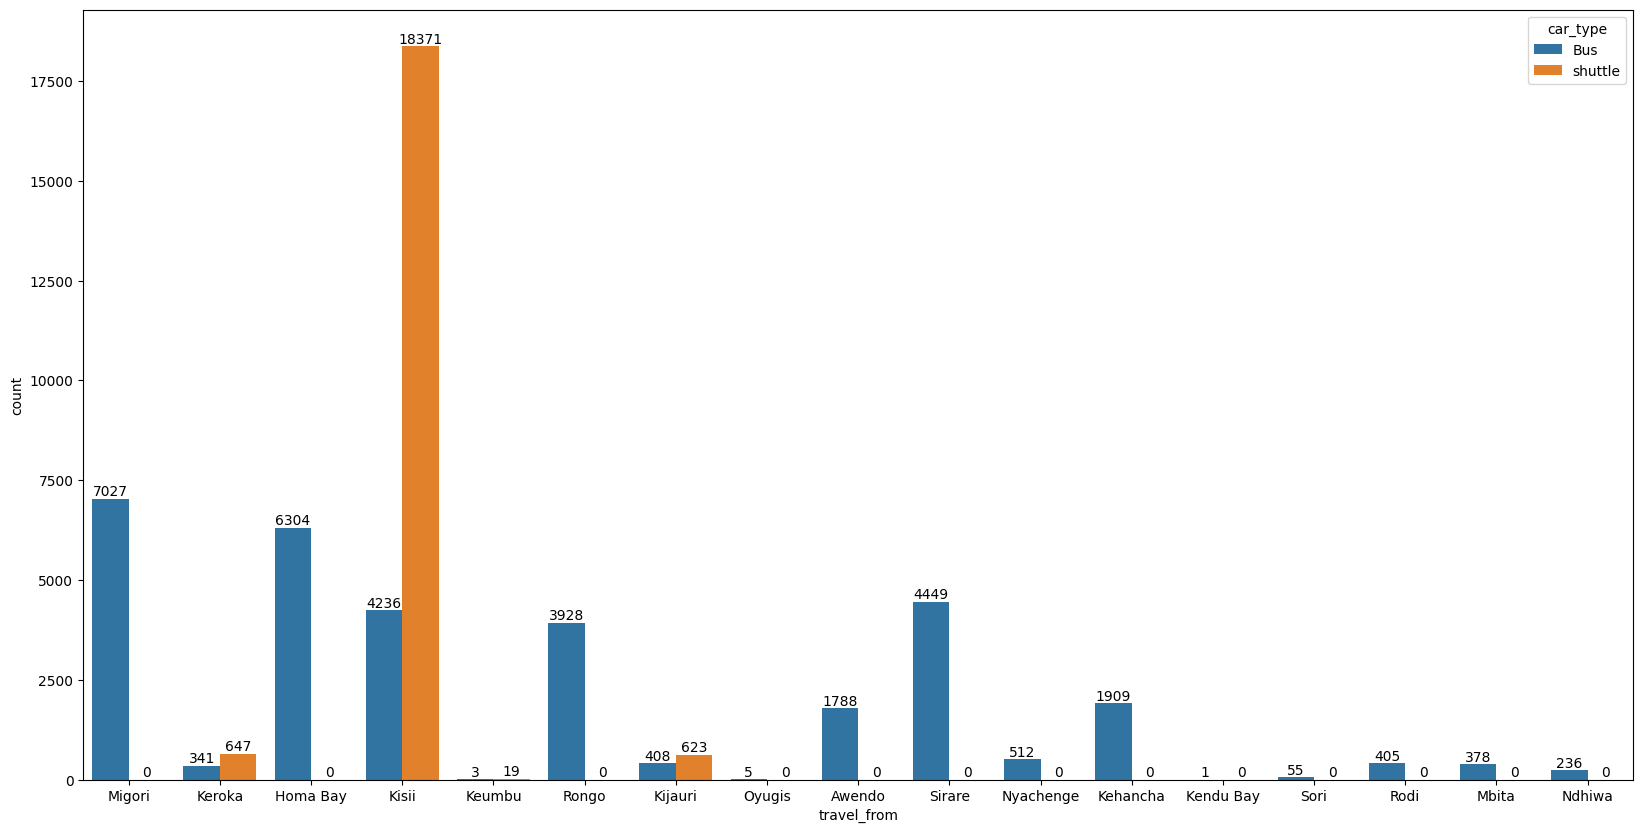

In [15]:
plt.figure(figsize=(20,10))
transport_count = sns.countplot(x = df['travel_from'], hue = 'car_type', data = df)
for i in transport_count.containers:
    transport_count.bar_label(i)

from the above graph it is clearly visible that the majority of the passengers prefered the bus journey at all locations rather than the shuttle journey but in few locations i.e (keroka, kisii and kijauri) people prefered to travel on shuttle.
 __ compared to shuttles most of the passengers prefered buses and majority of the buses are more in these routes.

In [16]:
#how many vechile are going at what date at what time

In [17]:
vechile = df.groupby(['ride_id', 'car_type', 'travel_date', 'travel_time']).size().reset_index().rename({0: 'passenger_count'}, axis = 1)
vechile = vechile.sort_values(by = 'passenger_count', ascending = False).reset_index().drop({'index'}, axis = 1)
vechile

,ride_id,car_type,travel_date,travel_time,passenger_count
0,8454,Bus,09-01-18,7:00,50
1,10834,Bus,19-02-18,19:07,49
2,8090,Bus,27-12-17,7:08,49
3,11382,Bus,13-12-17,7:02,49
4,13211,Bus,09-04-18,19:07,49
...,...,...,...,...,...
6244,6031,shuttle,04-04-18,6:00,1
6245,6032,shuttle,04-04-18,5:30,1
6246,6037,Bus,03-04-18,7:06,1
6247,6038,Bus,03-04-18,7:07,1


In [18]:
vechile[(vechile['travel_date'] == '27-12-17') & (vechile['car_type'] == 'Bus')]

,ride_id,car_type,travel_date,travel_time,passenger_count
2,8090,Bus,27-12-17,7:08,49
7,8089,Bus,27-12-17,7:15,48
21,8095,Bus,27-12-17,7:13,47
25,8094,Bus,27-12-17,7:12,47
28,8093,Bus,27-12-17,7:00,47
271,8087,Bus,27-12-17,7:09,30
2162,10468,Bus,27-12-17,7:06,10
2651,8096,Bus,27-12-17,7:04,8
2934,8101,Bus,27-12-17,7:05,7
4495,8098,Bus,27-12-17,7:09,2


In [19]:
vechile.query('travel_time > "7:00:00"')

,ride_id,car_type,travel_date,travel_time,passenger_count
2,8090,Bus,27-12-17,7:08,49
3,11382,Bus,13-12-17,7:02,49
5,12160,Bus,13-03-18,7:12,48
7,8089,Bus,27-12-17,7:15,48
12,7891,Bus,21-12-17,7:12,48
...,...,...,...,...,...
6242,6029,Bus,04-04-18,7:08,1
6243,6030,Bus,04-04-18,7:06,1
6246,6037,Bus,03-04-18,7:06,1
6247,6038,Bus,03-04-18,7:07,1


In [20]:
df['payment_method'].nunique()

2

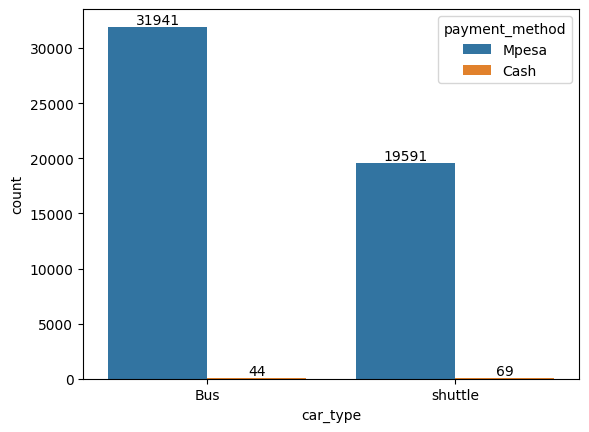

In [21]:
payment_count = sns.countplot(x = df['car_type'], hue = 'payment_method', data = df)
for i in payment_count.containers:
    payment_count.bar_label(i)

from the above graph i can depict that majority of passengers are prefering purchasing tickets through online payment method i.e Mpesa compare to paying directly through cash from both transportation

In [22]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [23]:
df[(df['car_type'] == 'Bus') & (df['travel_date'] == '17-10-17')]

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49


In [24]:
df['ride_id'].value_counts()

8454     50
13211    49
10834    49
8090     49
11382    49
         ..
10090     1
10091     1
10114     1
10116     1
14304     1
Name: ride_id, Length: 6249, dtype: int64

In [25]:
df.groupby(['travel_from', 'travel_date', 'car_type', 'travel_time'], axis = 0, sort = True)['ride_id'].value_counts().sort_values(ascending = False)

travel_from  travel_date  car_type  travel_time  ride_id
Sirare       09-01-18     Bus       7:00         8454       50
Migori       27-12-17     Bus       7:08         8090       49
Kisii        13-12-17     Bus       7:02         11382      49
Sirare       19-02-18     Bus       19:07        10834      49
             09-04-18     Bus       19:07        13211      49
                                                            ..
Nyachenge    15-01-18     Bus       7:04         8684        1
Kisii        26-12-17     shuttle   9:10         10476       1
             27-01-18     Bus       7:00         9341        1
                                    7:06         9340        1
             13-04-18     Bus       7:07         5889        1
Name: ride_id, Length: 6249, dtype: int64

In [26]:
result = df.groupby(['travel_from', 'travel_date', 'car_type', 'travel_time'], as_index = False)['ride_id'].value_counts().sort_values(by = 'car_type', ascending = False)
result = result.sort_values(by = 'count', ascending = False).reset_index()
result.drop({'index'}, axis = 1, inplace = True)
result.rename({'count':'passengers_count'}, axis = 1, inplace = True)
result.head()

,travel_from,travel_date,car_type,travel_time,ride_id,passengers_count
0,Sirare,09-01-18,Bus,7:00,8454,50
1,Kisii,13-12-17,Bus,7:02,11382,49
2,Migori,27-12-17,Bus,7:08,8090,49
3,Sirare,19-02-18,Bus,19:07,10834,49
4,Sirare,09-04-18,Bus,19:07,13211,49


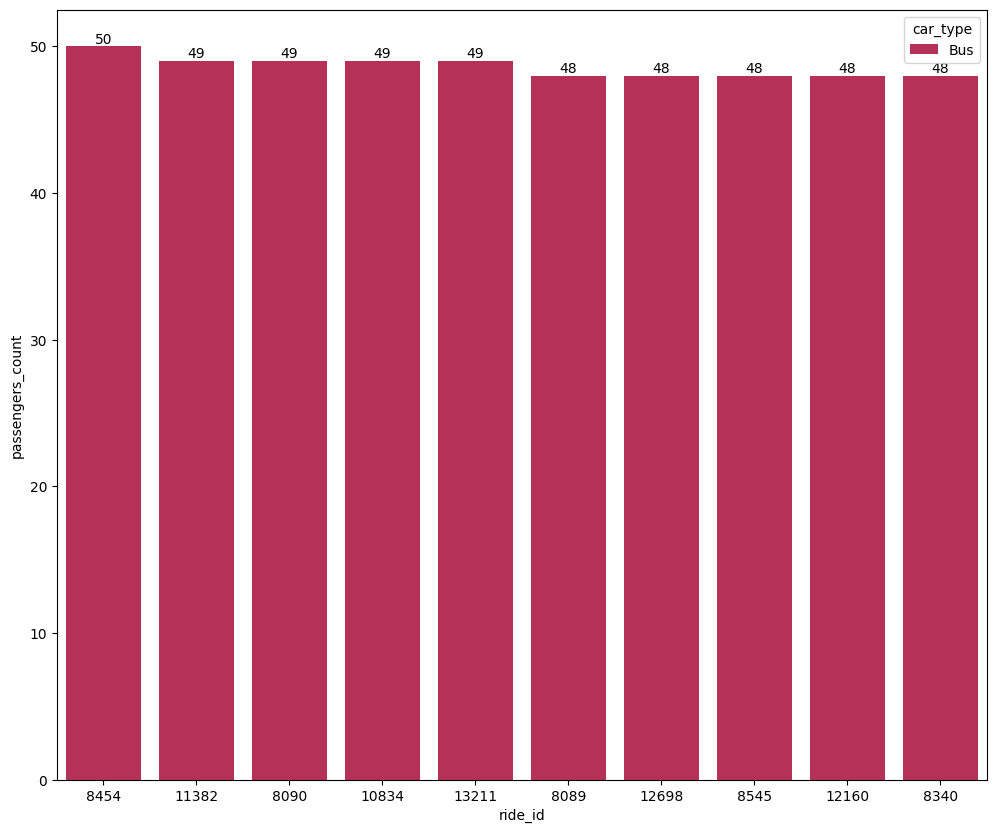

In [27]:
plt.figure(figsize=(12,10))
passengers_plot = sns.barplot(x = 'ride_id', y = 'passengers_count', hue = 'car_type', data = result[:10], palette= "rocket")

for i in passengers_plot.containers:
    passengers_plot.bar_label(i)

the above bar graph depicts the information of top 10 highest sold seats i.e total number of passengers get into bus.


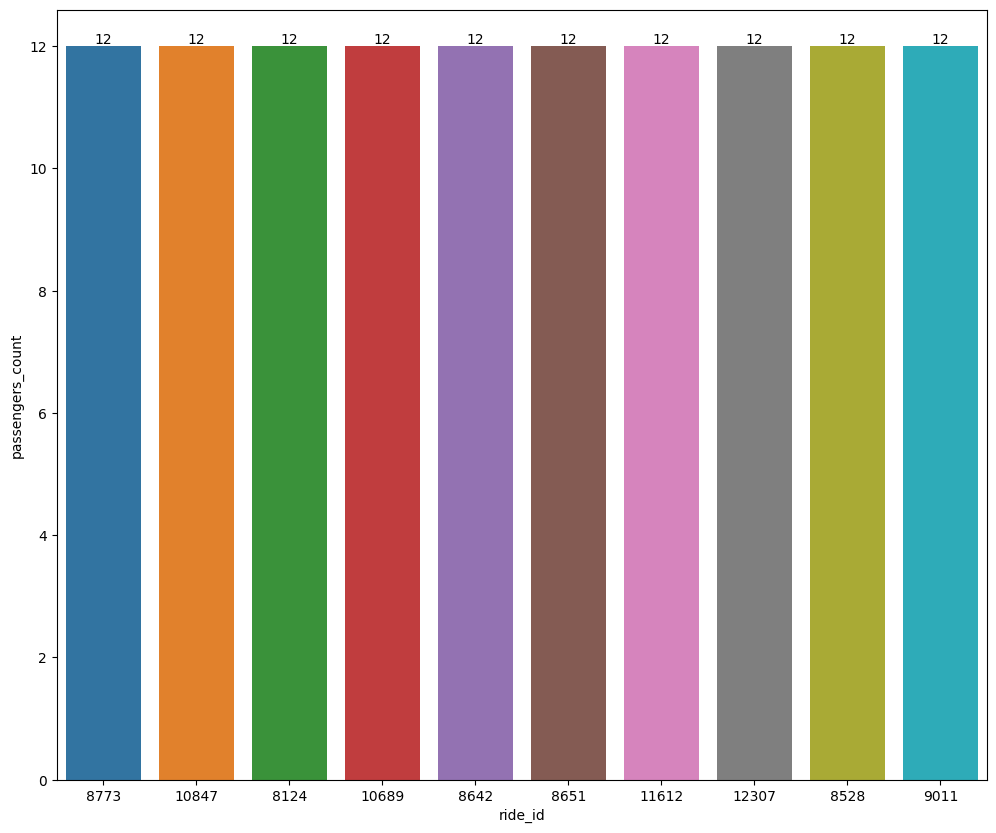

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_result = result[result['car_type'] == 'shuttle'][:10] 

plt.figure(figsize=(12, 10))
passengers_plot = sns.barplot(x='ride_id', y='passengers_count', data=filtered_result)
for i in passengers_plot.containers:
    passengers_plot.bar_label(i)

In [29]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [30]:
ride_values = df['ride_id'].value_counts().values

In [31]:
ride_index = df['ride_id'].value_counts().index

([<matplotlib.patches.Wedge at 0x1bf0c2f6dd0>,
 [Text(1.0430431567922451, 0.3493722557228439, '8454'),
  Text(0.6280184691633118, 0.9031017674602184, '13211'),
  Text(-0.028439216491967314, 1.0996323071669563, '10834'),
  Text(-0.6738605836330973, 0.8694319489331304, '8090'),
  Text(-1.0577789646703057, 0.3018338316044383, '11382'),
  Text(-1.033661890692157, -0.3762221361519223, '8340'),
  Text(-0.6221675777149377, -0.9071424944518514, '8545'),
  Text(0.02133045223665248, -1.0997931677399075, '12698'),
  Text(0.6568744447537894, -0.8823355165861799, '12160'),
  Text(1.0474726730958284, -0.3358585998861428, '8089')],
 [Text(0.5689326309775882, 0.19056668493973303, '10.29%'),
  Text(0.3425555286345337, 0.49260096406921, '10.08%'),
  Text(-0.015512299904709443, 0.5997994402728851, '10.08%'),
  Text(-0.36756031834532576, 0.47423560850898017, '10.08%'),
  Text(-0.5769703443656212, 0.1646366354206027, '10.08%'),
  Text(-0.5638155767411764, -0.20521207426468485, '9.88%'),
  Text(-0.339364133

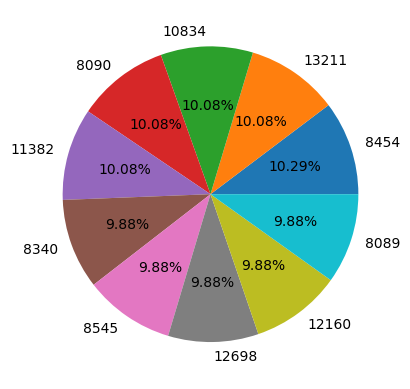

In [32]:
plt.pie(ride_values[:10], labels = ride_index[:10],autopct = '%1.2f%%')

In [33]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [34]:
result.head()

,travel_from,travel_date,car_type,travel_time,ride_id,passengers_count
0,Sirare,09-01-18,Bus,7:00,8454,50
1,Kisii,13-12-17,Bus,7:02,11382,49
2,Migori,27-12-17,Bus,7:08,8090,49
3,Sirare,19-02-18,Bus,19:07,10834,49
4,Sirare,09-04-18,Bus,19:07,13211,49


In [35]:
 result_new = result[['ride_id', 'passengers_count']]

In [36]:
 new_df = pd.merge(df,result_new, on = 'ride_id' ,how = 'left')

In [37]:
new_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,passengers_count
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


In [38]:
new_df[new_df['ride_id']=='8454']

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,passengers_count
14020,8454,18A,Mpesa,RPOXVAJVME,09-01-18,7:00,Sirare,Nairobi,Bus,49,50
14021,8454,17A,Mpesa,MLT0APU7IV,09-01-18,7:00,Sirare,Nairobi,Bus,49,50
14022,8454,12B,Mpesa,VMWIO5SZRU,09-01-18,7:00,Sirare,Nairobi,Bus,49,50
14023,8454,12A,Mpesa,VYZXWTUEAX,09-01-18,7:00,Sirare,Nairobi,Bus,49,50
14026,8454,10A,Mpesa,LJVXBMLNW6,09-01-18,7:00,Sirare,Nairobi,Bus,49,50
14027,8454,7B,Mpesa,NFS5RNX8VX,09-01-18,7:00,Sirare,Nairobi,Bus,49,50
14028,8454,7A,Mpesa,YW6CTMAQEY,09-01-18,7:00,Sirare,Nairobi,Bus,49,50
14029,8454,9A,Mpesa,LHFFCBC2QC,09-01-18,7:00,Sirare,Nairobi,Bus,49,50
14030,8454,14A,Mpesa,7U2GHUPMXJ,09-01-18,7:00,Sirare,Nairobi,Bus,49,50
14031,8454,13A,Mpesa,O7MXQV8VNF,09-01-18,7:00,Sirare,Nairobi,Bus,49,50


In [39]:
new_df['travel_to'].nunique()

1

In [40]:
new_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,passengers_count
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


In [41]:
def categorize_time(time_str):
    if time_str:
        hour = int(time_str.split(':')[0])
        if 6 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 18:
            return 'Afternoon'
        elif 18 <= hour < 24:
            return 'Evening'
        else:
            return 'Night'
    else:
        return 'Unknown'
new_df['travel_time'] = new_df['travel_time'].apply(categorize_time)


In [42]:
new_df['travel_time']

0        Morning
1        Morning
2        Morning
3        Morning
4        Morning
          ...   
51640    Morning
51641    Morning
51642    Morning
51643    Morning
51644      Night
Name: travel_time, Length: 51645, dtype: object

In [43]:
new_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,passengers_count
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,Morning,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,Morning,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,Morning,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,Morning,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,Morning,Migori,Nairobi,Bus,49,31


In [44]:
new_df['travel_date'] = new_df['travel_date'].astype('str')

In [45]:
from datetime import datetime
def convert_date(date):
    date_obj = datetime.strptime(date, "%d-%m-%y")
    day_of_week = date_obj.strftime("%A")
    return day_of_week

In [46]:
new_df['travel_date'] = new_df['travel_date'].apply(convert_date)

In [47]:
new_df['travel_date']

0        Tuesday
1         Sunday
2         Sunday
3         Monday
4         Monday
          ...   
51640     Friday
51641     Friday
51642     Friday
51643     Friday
51644    Tuesday
Name: travel_date, Length: 51645, dtype: object

In [48]:
new_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,passengers_count
0,1442,15A,Mpesa,UZUEHCBUSO,Tuesday,Morning,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,Sunday,Morning,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,Sunday,Morning,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,Monday,Morning,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,Monday,Morning,Migori,Nairobi,Bus,49,31


In [49]:
new_df['travel_date'].nunique()

7

In [50]:
new_df['travel_time'].nunique()

3

In [51]:
new_df['travel_time'].unique()

array(['Morning', 'Night', 'Evening'], dtype=object)

In [52]:
new_df['ride_id'].nunique()

6249

In [53]:
new_df.dtypes

ride_id             object
seat_number         object
payment_method      object
payment_receipt     object
travel_date         object
travel_time         object
travel_from         object
travel_to           object
car_type            object
max_capacity         int64
passengers_count     int64
dtype: object

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
label = LabelEncoder()
new_df['travel_date'] = label.fit_transform(new_df['travel_date'])
new_df['travel_time'] = label.fit_transform(new_df['travel_time'])

In [56]:
new_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,passengers_count
0,1442,15A,Mpesa,UZUEHCBUSO,5,1,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,3,1,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,3,1,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,1,1,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,1,1,Migori,Nairobi,Bus,49,31


In [57]:
new_df.rename({'travel_date': 'travel_day', 'travel_time': 'travel_period'}, axis = 1, inplace = True)

In [58]:
new_df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_day,travel_period,travel_from,travel_to,car_type,max_capacity,passengers_count
0,1442,15A,Mpesa,UZUEHCBUSO,5,1,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,3,1,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,3,1,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,1,1,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,1,1,Migori,Nairobi,Bus,49,31


In [59]:
new_df['travel_period'].value_counts()

1    45269
0     4861
2     1515
Name: travel_period, dtype: int64

1: morning , 0: evening , 2 : night

In [60]:
new_df = pd.get_dummies(new_df, columns = ['payment_method'])

In [61]:
new_df = pd.get_dummies(new_df, columns = ['travel_to'])

In [62]:
 df = new_df.drop('car_type', axis = 1)

In [63]:
df.head()

,ride_id,seat_number,payment_receipt,travel_day,travel_period,travel_from,max_capacity,passengers_count,payment_method_Cash,payment_method_Mpesa,travel_to_Nairobi
0,1442,15A,UZUEHCBUSO,5,1,Migori,49,1,0,1,1
1,5437,14A,TIHLBUSGTE,3,1,Migori,49,1,0,1,1
2,5710,8B,EQX8Q5G19O,3,1,Keroka,49,1,0,1,1
3,5777,19A,SGP18CL0ME,1,1,Homa Bay,49,5,0,1,1
4,5778,11A,BM97HFRGL9,1,1,Migori,49,31,0,1,1


In [64]:
df['travel_from'].nunique()

17

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le = LabelEncoder()
df['travel_from'] = le.fit_transform(df['travel_from'])

In [67]:
df.head()

,ride_id,seat_number,payment_receipt,travel_day,travel_period,travel_from,max_capacity,passengers_count,payment_method_Cash,payment_method_Mpesa,travel_to_Nairobi
0,1442,15A,UZUEHCBUSO,5,1,9,49,1,0,1,1
1,5437,14A,TIHLBUSGTE,3,1,9,49,1,0,1,1
2,5710,8B,EQX8Q5G19O,3,1,4,49,1,0,1,1
3,5777,19A,SGP18CL0ME,1,1,1,49,5,0,1,1
4,5778,11A,BM97HFRGL9,1,1,9,49,31,0,1,1


In [68]:
df['travel_from'].value_counts()

7     22607
9      7027
1      6304
15     4449
14     3928
2      1909
0      1788
6      1031
4       988
11      512
13      405
8       378
10      236
16       55
5        22
12        5
3         1
Name: travel_from, dtype: int64

In [69]:
df.head()

,ride_id,seat_number,payment_receipt,travel_day,travel_period,travel_from,max_capacity,passengers_count,payment_method_Cash,payment_method_Mpesa,travel_to_Nairobi
0,1442,15A,UZUEHCBUSO,5,1,9,49,1,0,1,1
1,5437,14A,TIHLBUSGTE,3,1,9,49,1,0,1,1
2,5710,8B,EQX8Q5G19O,3,1,4,49,1,0,1,1
3,5777,19A,SGP18CL0ME,1,1,1,49,5,0,1,1
4,5778,11A,BM97HFRGL9,1,1,9,49,31,0,1,1


In [70]:
df.rename({'passengers_count': 'passengers_seatcount'}, axis = 1, inplace = True)

In [71]:
df.head()

,ride_id,seat_number,payment_receipt,travel_day,travel_period,travel_from,max_capacity,passengers_seatcount,payment_method_Cash,payment_method_Mpesa,travel_to_Nairobi
0,1442,15A,UZUEHCBUSO,5,1,9,49,1,0,1,1
1,5437,14A,TIHLBUSGTE,3,1,9,49,1,0,1,1
2,5710,8B,EQX8Q5G19O,3,1,4,49,1,0,1,1
3,5777,19A,SGP18CL0ME,1,1,1,49,5,0,1,1
4,5778,11A,BM97HFRGL9,1,1,9,49,31,0,1,1


In [72]:
df['ride_id'].value_counts()

8454     50
13211    49
10834    49
8090     49
11382    49
         ..
10090     1
10091     1
10114     1
10116     1
14304     1
Name: ride_id, Length: 6249, dtype: int64

In [73]:
df['ride_id'].nunique()

6249

In [74]:
df.duplicated().sum()

0

In [75]:
df.drop_duplicates(inplace = True)

In [76]:
df.head()

,ride_id,seat_number,payment_receipt,travel_day,travel_period,travel_from,max_capacity,passengers_seatcount,payment_method_Cash,payment_method_Mpesa,travel_to_Nairobi
0,1442,15A,UZUEHCBUSO,5,1,9,49,1,0,1,1
1,5437,14A,TIHLBUSGTE,3,1,9,49,1,0,1,1
2,5710,8B,EQX8Q5G19O,3,1,4,49,1,0,1,1
3,5777,19A,SGP18CL0ME,1,1,1,49,5,0,1,1
4,5778,11A,BM97HFRGL9,1,1,9,49,31,0,1,1


In [77]:
df['ride_id'].value_counts().values

array([50, 49, 49, ...,  1,  1,  1], dtype=int64)

In [78]:
transport_df = df[['travel_day', 'travel_period', 'travel_from', 'payment_method_Cash', 'payment_method_Mpesa', 'travel_to_Nairobi','max_capacity','passengers_seatcount']]

In [79]:
transport_df.head()

,travel_day,travel_period,travel_from,payment_method_Cash,payment_method_Mpesa,travel_to_Nairobi,max_capacity,passengers_seatcount
0,5,1,9,0,1,1,49,1
1,3,1,9,0,1,1,49,1
2,3,1,4,0,1,1,49,1
3,1,1,1,0,1,1,49,5
4,1,1,9,0,1,1,49,31


In [80]:
X = transport_df.iloc[:, : -1]

In [81]:
Y = transport_df.iloc[:, -1]

In [82]:
X.head()

,travel_day,travel_period,travel_from,payment_method_Cash,payment_method_Mpesa,travel_to_Nairobi,max_capacity
0,5,1,9,0,1,1,49
1,3,1,9,0,1,1,49
2,3,1,4,0,1,1,49
3,1,1,1,0,1,1,49
4,1,1,9,0,1,1,49


In [83]:
 X = X.drop(columns = ['travel_to_Nairobi'], axis = 1)

In [84]:
X.head(5)

,travel_day,travel_period,travel_from,payment_method_Cash,payment_method_Mpesa,max_capacity
0,5,1,9,0,1,49
1,3,1,9,0,1,49
2,3,1,4,0,1,49
3,1,1,1,0,1,49
4,1,1,9,0,1,49


In [85]:
X.describe()

,travel_day,travel_period,travel_from,payment_method_Cash,payment_method_Mpesa,max_capacity
count,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000
mean,3.008868,0.935212,7.373666,0.002188,0.997812,34.534321
std,2.080704,0.345345,4.175185,0.046725,0.046725,18.451193
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,1.000000,1.000000,7.000000,0.000000,1.000000,11.000000
50%,3.000000,1.000000,7.000000,0.000000,1.000000,49.000000
75%,5.000000,1.000000,9.000000,0.000000,1.000000,49.000000
max,6.000000,2.000000,16.000000,1.000000,1.000000,49.000000


In [86]:
X.columns

Index(['travel_day', 'travel_period', 'travel_from', 'payment_method_Cash',
       'payment_method_Mpesa', 'max_capacity'],
      dtype='object')

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scalar = StandardScaler(with_mean=True, with_std=True)
data = scalar.fit_transform(X)

In [90]:
 X_stand = pd.DataFrame(data, columns= ['travel_day', 'travel_period', 'travel_from', 'payment_method_Cash',
       'payment_method_Mpesa', 'max_capacity'])

In [91]:
from sklearn.preprocessing import MinMaxScaler
min = MinMaxScaler(feature_range=(0, 1), clip=True)
min = min.fit_transform(X)
X_min = pd.DataFrame(min, columns= ['travel_day', 'travel_period', 'travel_from', 'payment_method_Cash',
       'payment_method_Mpesa', 'max_capacity'])

In [92]:
X_stand.describe()

,travel_day,travel_period,travel_from,payment_method_Cash,payment_method_Mpesa,max_capacity
count,5.164500e+04,5.164500e+04,5.164500e+04,5.164500e+04,5.164500e+04,5.164500e+04
mean,3.301970e-17,2.421445e-17,-1.161193e-16,-7.704597e-18,-3.113483e-16,-1.672998e-16
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.446096e+00,-2.708078e+00,-1.766086e+00,-4.682747e-02,-2.135499e+01,-1.275503e+00
25%,-9.654845e-01,1.876070e-01,-8.949783e-02,-4.682747e-02,4.682747e-02,-1.275503e+00
50%,-4.262173e-03,1.876070e-01,-8.949783e-02,-4.682747e-02,4.682747e-02,7.840045e-01
75%,9.569601e-01,1.876070e-01,3.895275e-01,-4.682747e-02,4.682747e-02,7.840045e-01
max,1.437571e+00,3.083292e+00,2.066116e+00,2.135499e+01,4.682747e-02,7.840045e-01


In [93]:
X_min.describe()

,travel_day,travel_period,travel_from,payment_method_Cash,payment_method_Mpesa,max_capacity
count,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000,51645.000000
mean,0.501478,0.467606,0.460854,0.002188,0.997812,0.619324
std,0.346784,0.172672,0.260949,0.046725,0.046725,0.485558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.500000,0.437500,0.000000,1.000000,0.000000
50%,0.500000,0.500000,0.437500,0.000000,1.000000,1.000000
75%,0.833333,0.500000,0.562500,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

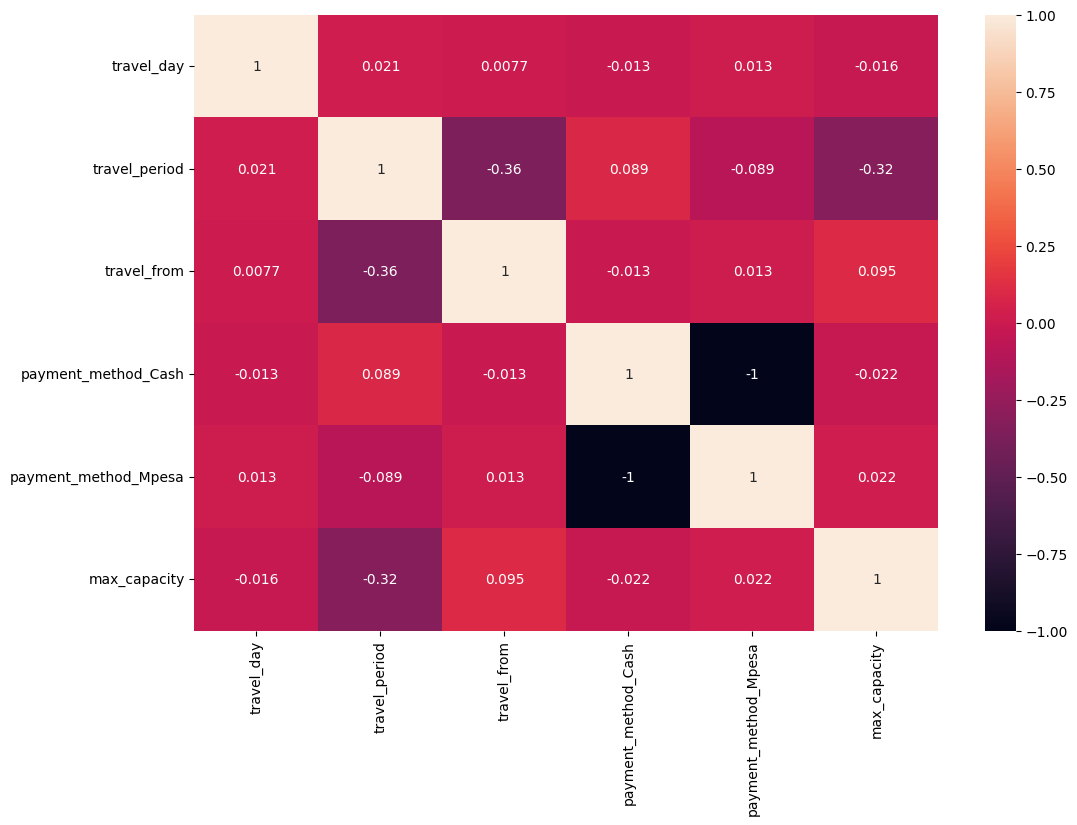

In [94]:
cor = X_min.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot = True)

In [95]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
        return col_corr

In [145]:
corr_features = correlation(X_stand, 0.8)
corr_features

set()

In [97]:
len(set(corr_features))

0

In [99]:
corr_features = correlation(X_min, 0.8)

In [100]:
len(set(corr_features))

0

In [169]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
linear = LinearRegression(fit_intercept=True)
scores_min = cross_val_score(linear, X_min, Y, cv=5, scoring='neg_mean_absolute_error').mean()
scores_stand = cross_val_score(linear, X_stand, Y, cv=5, scoring='neg_mean_absolute_error').mean()


In [170]:
print(scores_min)

-7.492868297021265


In [171]:
print(scores_stand)

-7.492669312916041


In [175]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, Y_train, Y_test = train_test_split(X_stand, Y, test_size=0.3, random_state=42, shuffle=True)
x_train, x_test, y_train, y_test = train_test_split(X_min, Y, test_size=0.3, random_state=42, shuffle=True)

In [179]:
reg = linear.fit(X_train, Y_train)
predictions = linear.predict(X_test)
mean_squared_error(predictions,Y_test,squared=False)

10.045990640381264

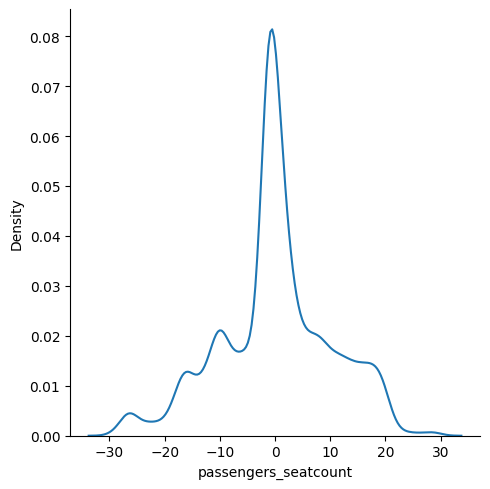

In [186]:
sns.displot(predictions-Y_test, kind = 'kde')

In [191]:
reg = linear.fit(x_train, y_train)
predictions = linear.predict(x_test)
mean_squared_error(predictions,y_test,squared=False)

10.045967742038133

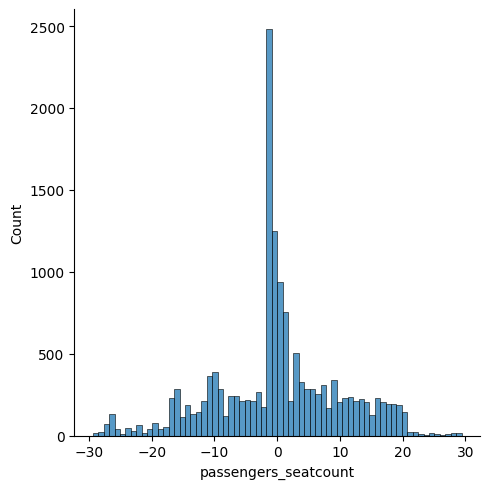

In [189]:
sns.displot(predictions-y_test)

feature selections

In [115]:
from sklearn.ensemble import ExtraTreesRegressor

In [120]:
Regressor = ExtraTreesRegressor()
Regressor.fit(X_train, Y_train)
print(Regressor.feature_importances_)

[0.04286081 0.10673288 0.4052423  0.00051657 0.00052799 0.44411945]


In [133]:
pd.Series(Regressor.feature_importances_, index =X_train.columns).nlargest(10)

max_capacity            0.444119
travel_from             0.405242
travel_period           0.106733
travel_day              0.042861
payment_method_Mpesa    0.000528
payment_method_Cash     0.000517
dtype: float64

In [131]:
X_train.columns

Index(['travel_day', 'travel_period', 'travel_from', 'payment_method_Cash',
       'payment_method_Mpesa', 'max_capacity'],
      dtype='object')

<Axes: >

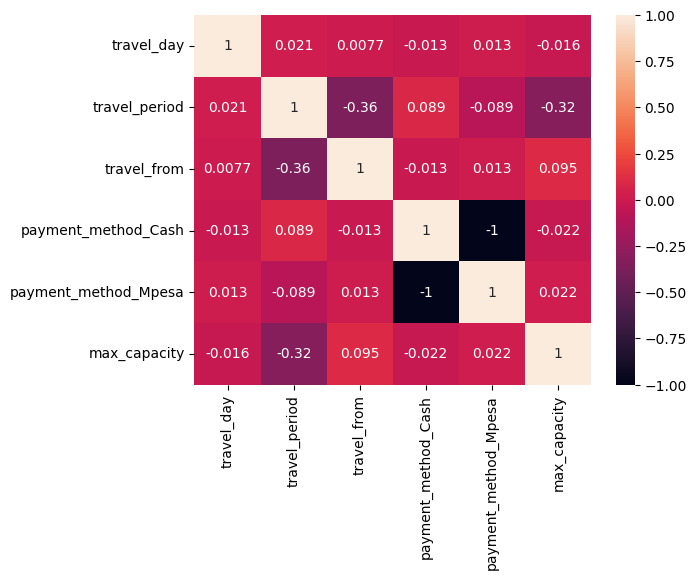

In [137]:
correlation = X.corr()
sns.heatmap(correlation, annot = True)    

In [155]:
threshold = 0.2
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
        return col_corr

In [159]:
len(correlation(X.iloc[:, :-1], threshold))

0

In [160]:
from sklearn.ensemble import RandomForestRegressor

In [164]:
forest = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=5, random_state = 42)
forest.fit(X_train, Y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [200]:
prediction = forest.predict(X_test)
mean_squared_error(prediction, Y_test, squared = False)

13.065270839979837

In [201]:
forest.fit(x_train, y_train)
prediction = forest.predict(x_test)
mean_squared_error(prediction, y_test, squared = False)

8.099724592738067

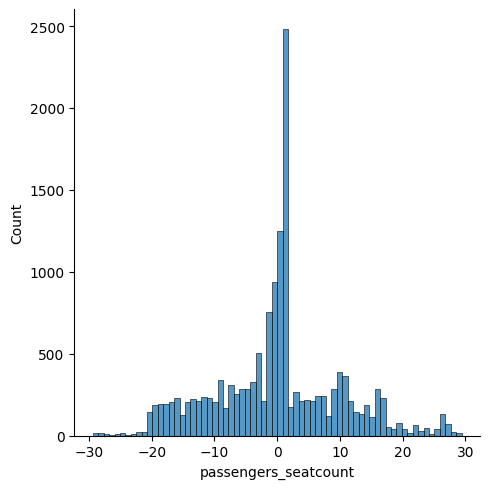

In [194]:
sns.displot(Y_test-predictions)